In [1]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing data
coupon = pd.read_csv('D:\MMA\W1\INSY695\Project\in-vehicle-coupon-recommendation.csv')

In [3]:
#Looking into data
coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
#checking for null or missing values
coupon.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [5]:
coupon.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
#removing column 'car' due to high missing values and lack of description in survey
#removing column 'toCoupon_GEQ5min' as it has unary values
coupon = coupon.drop(axis=1, columns=['car', 'toCoupon_GEQ5min'])

### Data Visualization

<AxesSubplot:xlabel='time', ylabel='Count'>

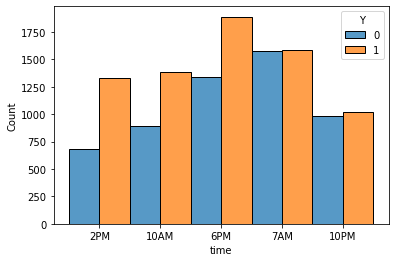

In [8]:
sns.histplot(data=coupon, x="time", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='weather', ylabel='Count'>

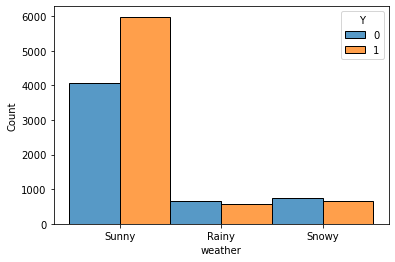

In [9]:
sns.histplot(data=coupon, x="weather", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='expiration', ylabel='Count'>

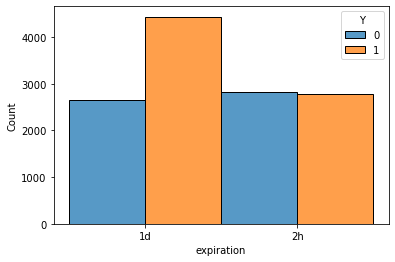

In [10]:
sns.histplot(data=coupon, x="expiration", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='gender', ylabel='Count'>

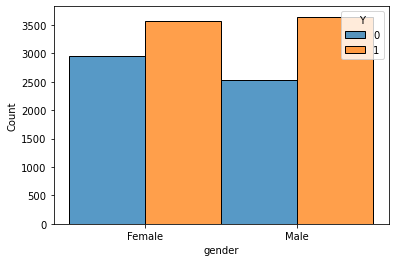

In [11]:
sns.histplot(data=coupon, x="gender", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='age', ylabel='Count'>

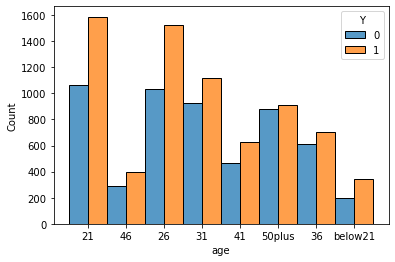

In [12]:
sns.histplot(data=coupon, x="age", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='maritalStatus', ylabel='Count'>

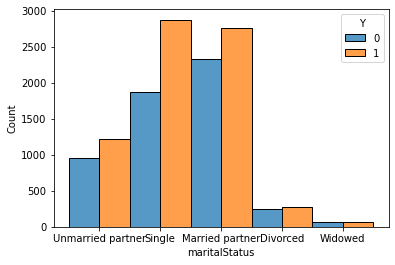

In [13]:
sns.histplot(data=coupon, x="maritalStatus", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='direction_same', ylabel='Count'>

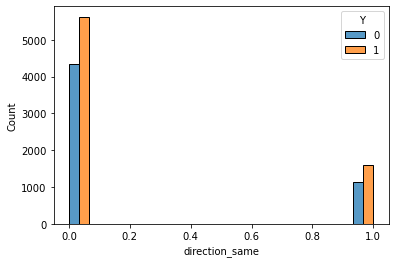

In [14]:
sns.histplot(data=coupon, x="direction_same", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='direction_opp', ylabel='Count'>

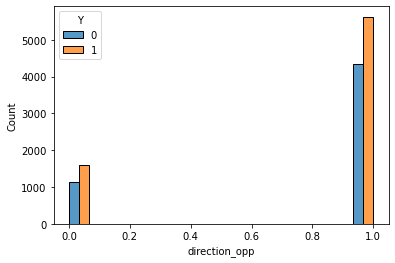

In [15]:
sns.histplot(data=coupon, x="direction_opp", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='passanger', ylabel='Count'>

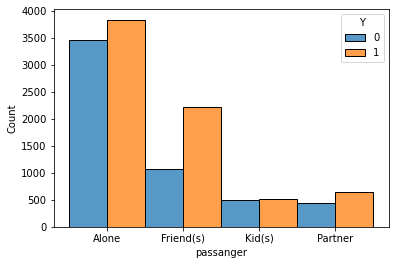

In [16]:
sns.histplot(data=coupon, x="passanger", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='has_children', ylabel='Count'>

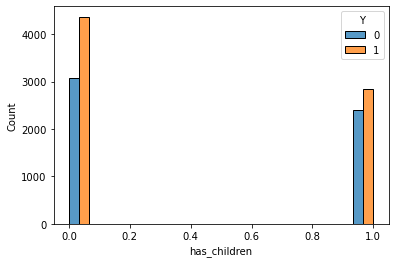

In [17]:
sns.histplot(data=coupon, x="has_children", hue="Y", multiple="dodge")

<AxesSubplot:xlabel='Bar', ylabel='count'>

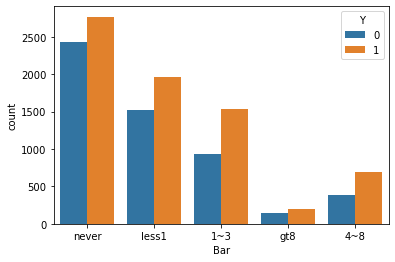

In [18]:
sns.countplot(x="Bar", hue="Y", data=coupon)

<AxesSubplot:xlabel='CoffeeHouse', ylabel='count'>

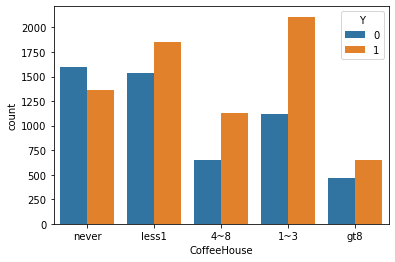

In [19]:
sns.countplot(x="CoffeeHouse", hue="Y", data=coupon)

<AxesSubplot:xlabel='CarryAway', ylabel='count'>

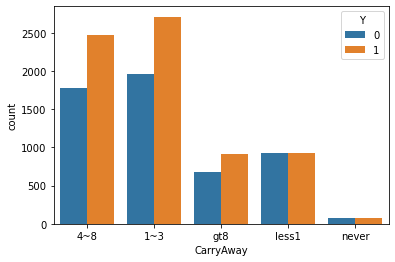

In [20]:
sns.countplot(x="CarryAway", hue="Y", data=coupon)

<AxesSubplot:xlabel='RestaurantLessThan20', ylabel='count'>

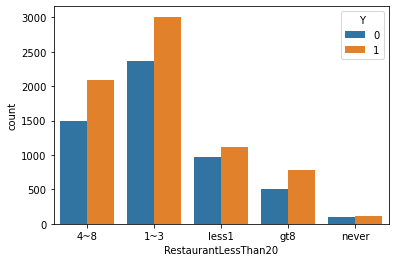

In [21]:
sns.countplot(x="RestaurantLessThan20", hue="Y", data=coupon)

<AxesSubplot:xlabel='Restaurant20To50', ylabel='count'>

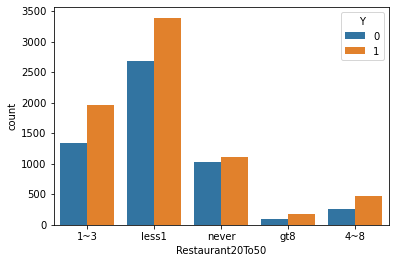

In [22]:
sns.countplot(x="Restaurant20To50", hue="Y", data=coupon)

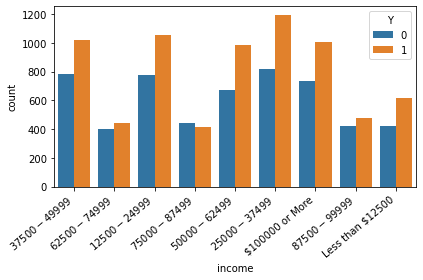

In [23]:
plt_income = sns.countplot(x="income", hue="Y", data=coupon)
plt_income.set_xticklabels(plt_income.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

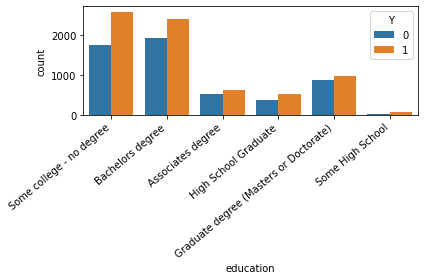

In [24]:
plt_edu = sns.countplot(x="education", hue="Y", data=coupon)
plt_edu.set_xticklabels(plt_edu.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

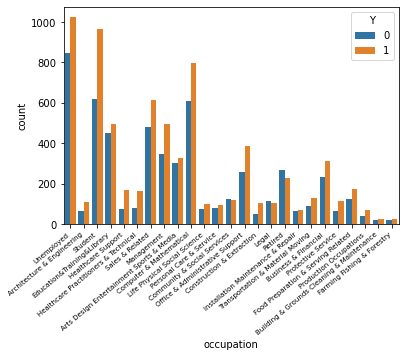

<Figure size 1080x288 with 0 Axes>

In [25]:
plt_occ = sns.countplot(x="occupation", hue="Y", data=coupon)
plt.figure(figsize=(15,4))
plt_occ.set_xticklabels(plt_occ.get_xticklabels(), rotation=40, ha="right", fontsize=7)
plt.tight_layout()
plt.show()

### Data-Cleaning and Transforming

In [26]:
#replacing text values for gender with numerical/binary value
coupon.loc[coupon['gender'] == 'Female', 'gender'] = 1
coupon.loc[coupon['gender'] == 'Male', 'gender'] = 0

In [27]:
#keeping the expiration/validity to same unit i.e. hours
coupon.loc[coupon['expiration'] == '1d', 'expiration'] = 24
coupon.loc[coupon['expiration'] == '2h', 'expiration'] = 2

In [28]:
#looking into count of distinct values in age
coupon['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [29]:
#replacing text values in age with numerical ones.
#replacing all 50+ values with 50
#replacing all below 21 values with 18 to represent below 21 group and has similar difference in age group as others
coupon.loc[coupon['age'] == '50plus', 'age'] = 50
coupon.loc[coupon['age'] == 'below21', 'age'] = 18

In [30]:
#looking into count of distinct values in time
coupon['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [31]:
#replacing hours in time to 24 hour format
time_mapper = {'6PM': 18, '7AM': 7, '10AM': 10, '2PM': 14, '10PM': 22}
coupon['time'] = coupon['time'].replace(time_mapper)

In [32]:
#looking into count of distinct values in age
coupon['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

- Some college - no degree                  3
- Bachelors degree                          5
- Graduate degree (Masters or Doctorate)    6
- Associates degree                         4
- High School Graduate                      2
- Some High School                          1

In [33]:
education_mapper = {'Some High School': 1, 'High School Graduate': 2, 'Some college - no degree': 3, 'Associates degree': 4, 'Bachelors degree': 5, 'Graduate degree (Masters or Doctorate)': 6}
coupon['education'] = coupon['education'].replace(education_mapper)      

In [34]:
#looking into count of distinct values in income
coupon['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

#### Approach1: Replacing values in income with Ordinal Encoding

|Income Range | Ordinal Encoding | 
| ------------- |-------------| 
| Less than 12500 | 1 |
| 12500 - 24999 | 2 |
| 25000 - 37499 | 3 |
| 37500 - 49999 | 4 |
| 50000 - 62499 | 5 |
| 62500 - 74999 | 6 |
| 75000 - 87499 | 7 |
| 87500 - 99999 | 8 |
| 100000 or More | 9 |

In [35]:
income_ord = {'Less than $12500': 1, '$12500 - $24999': 2, '$25000 - $37499': 3, '$37500 - $49999': 4, '$50000 - $62499': 5, '$62500 - $74999': 6, '$75000 - $87499': 7, '$87500 - $99999': 8, '$100000 or More': 9}


coupon['income_ord'] = coupon['income'].replace(income_ord)

#### Approach2: Splitting values in income into lower bound and upper bound based on range

In [36]:
income_ub_mapper = {'Less than $12500': 12499, '$12500 - $24999': 24999, '$25000 - $37499': 37499, '$37500 - $49999': 49999, '$50000 - $62499': 62499, '$62500 - $74999': 74999, '$75000 - $87499': 87499, '$87500 - $99999': 99999, '$100000 or More': 200000}
income_lb_mapper = {'Less than $12500': 0, '$12500 - $24999': 12500, '$25000 - $37499': 25000, '$37500 - $49999': 37500, '$50000 - $62499': 50000, '$62500 - $74999': 62500, '$75000 - $87499': 75000, '$87500 - $99999': 87500, '$100000 or More': 100000}
        

coupon['income_ub'] = coupon['income'].replace(income_ub_mapper)
coupon['income_lb'] = coupon['income'].replace(income_lb_mapper)

In [37]:
#looking into count of distinct values in Bar
coupon['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [38]:
#looking into count of distinct values in CoffeeHouse
coupon['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [39]:
#looking into count of distinct values in CarryAway
coupon['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [40]:
#looking into count of distinct values in RestaurantLessThan20
coupon['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [41]:
#looking into count of distinct values in Restaurant20To50
coupon['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

#### Replacing values of below columns with Ordinal Encoding

The distinct values of below columns are same and can be ranked. Therefore, replacing their text values with numericals using ordinal encoding.

|Values | Bar | CoffeeHouse | CarryAway | RestaurantLessThan20 | Restaurant20To50 |
| ------------- |-------------| ------| ------| ------| ------|
| never | 0 | 0 | 0 | 0 | 0 |
| less1 | 1 | 1 | 1 | 1 | 1 |
| 1~3 | 2 | 2 | 2 | 2 | 2 |
| 4~8 | 3 | 3 | 3 | 3 | 3 |
| gt8 | 4 | 4 | 4 | 4 | 4 |

In [42]:
visit_mapper = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}

In [43]:
coupon['Bar_ord'] = coupon['Bar'].replace(visit_mapper)
coupon['CoffeeHouse_ord'] = coupon['CoffeeHouse'].replace(visit_mapper)
coupon['CarryAway_ord'] = coupon['CarryAway'].replace(visit_mapper)
coupon['RestLT20_ord'] = coupon['RestaurantLessThan20'].replace(visit_mapper)
coupon['Rest20To50_ord'] = coupon['Restaurant20To50'].replace(visit_mapper)

In [44]:
#Dropping columns which were converted into new columns using ordinal encoding.
coupon = coupon.drop(axis=1, columns=['Restaurant20To50', 'RestaurantLessThan20', 'Bar', 'CoffeeHouse', 'CarryAway', 'income'])

### Categorical Encoding

For remaining text based columns, one hot encoding is used to get the dummies for the distinct values under this columns.

In [45]:
coupon = pd.get_dummies(coupon, columns = ['destination', 'passanger', 'weather', 'coupon', 'maritalStatus', 'occupation'])

### Missing Values

In [46]:
#Checking count to look at missing values.
coupon.count()

temperature                                    12684
time                                           12684
expiration                                     12684
gender                                         12684
age                                            12684
                                               ...  
occupation_Retired                             12684
occupation_Sales & Related                     12684
occupation_Student                             12684
occupation_Transportation & Material Moving    12684
occupation_Unemployed                          12684
Length: 65, dtype: int64

#### Using imputer to get median

In [47]:
imputer = SimpleImputer(strategy="median")

In [48]:
imputer.fit(coupon[['Bar_ord', 'CoffeeHouse_ord', 'CarryAway_ord', 'RestLT20_ord', 'Rest20To50_ord']])
imputer.statistics_

array([1., 1., 2., 2., 1.])

In [49]:
print(coupon['Bar_ord'].mode())
print(coupon['CoffeeHouse_ord'].mode())
print(coupon['CarryAway_ord'].mode())
print(coupon['RestLT20_ord'].mode())
print(coupon['Rest20To50_ord'].mode())

0    0.0
dtype: float64
0    1.0
dtype: float64
0    2.0
dtype: float64
0    2.0
dtype: float64
0    1.0
dtype: float64


### Median and Mode of columns with missing values
 - Since below columns have missing values, noting the median and mode for these columns

|Columns | Median | Mode | 
| ------------- |-------------| ------|
| Bar | 1 | 0 |
| CoffeeHouse | 1 | 1 | 
| CarryAway | 2 | 2 | 
| RestaurantLessThan20 | 2 | 2 |
| Restaurant20To50 | 1 | 1 |

#### Replacing missing values with median using imputer

In [50]:
coupon[['Bar_ord', 'CoffeeHouse_ord', 'CarryAway_ord', 'RestLT20_ord', 'Rest20To50_ord']] = imputer.transform(coupon[['Bar_ord', 'CoffeeHouse_ord', 'CarryAway_ord', 'RestLT20_ord', 'Rest20To50_ord']])

In [51]:
coupon.count()

temperature                                    12684
time                                           12684
expiration                                     12684
gender                                         12684
age                                            12684
                                               ...  
occupation_Retired                             12684
occupation_Sales & Related                     12684
occupation_Student                             12684
occupation_Transportation & Material Moving    12684
occupation_Unemployed                          12684
Length: 65, dtype: int64

The count is now consistent

### Correlation Matrix

In [52]:
coupon.corr()

,temperature,time,has_children,education,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_ord,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
temperature,1.000000,-0.044991,-0.019716,0.008462,-0.155332,-0.216254,0.097085,-0.097085,0.061240,-0.030233,...,0.041312,-0.019381,-0.003628,0.000524,0.024602,0.022649,-0.003650,0.023034,0.002065,-0.029308
time,-0.044991,1.000000,0.026965,0.009610,-0.061299,-0.188325,0.002614,-0.002614,0.010271,0.010190,...,-0.021263,0.001324,0.003806,0.008139,-0.011314,-0.013700,0.000804,-0.007331,0.000021,0.020315
has_children,-0.019716,0.026965,1.000000,0.081296,0.078211,-0.013722,-0.031620,0.031620,-0.045557,0.090754,...,0.065045,-0.048764,0.081676,-0.002686,-0.010257,0.114056,-0.046576,-0.222232,0.048911,-0.014198
education,0.008462,0.009610,0.081296,1.000000,0.022575,0.003603,-0.003433,0.003433,-0.052902,0.291567,...,0.100946,-0.079866,-0.012431,-0.068553,-0.047691,0.051814,-0.032885,-0.145635,-0.066045,-0.114949
toCoupon_GEQ15min,-0.155332,-0.061299,0.078211,0.022575,1.000000,0.324984,-0.303533,0.303533,-0.081602,0.020129,...,0.002218,-0.004936,0.010540,0.002117,0.002368,0.004152,-0.015692,-0.019421,-0.002941,-0.002687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Retired,0.022649,-0.013700,0.114056,0.051814,0.004152,0.000041,-0.007243,0.007243,-0.044693,-0.002094,...,-0.053599,-0.046416,-0.023836,-0.018849,-0.023836,1.000000,-0.061883,-0.076126,-0.026649,-0.083800
occupation_Sales & Related,-0.003650,0.000804,-0.046576,-0.032885,-0.015692,0.000689,0.002920,-0.002920,-0.003572,-0.063590,...,-0.081674,-0.070729,-0.036321,-0.028722,-0.036321,-0.061883,1.000000,-0.116002,-0.040608,-0.127696
occupation_Student,0.023034,-0.007331,-0.222232,-0.145635,-0.019421,0.003905,0.026030,-0.026030,0.032069,-0.117955,...,-0.100474,-0.087009,-0.044681,-0.035333,-0.044681,-0.076126,-0.116002,1.000000,-0.049955,-0.157088
occupation_Transportation & Material Moving,0.002065,0.000021,0.048911,-0.066045,-0.002941,-0.001816,-0.004162,0.004162,0.007448,-0.002199,...,-0.035172,-0.030459,-0.015641,-0.012369,-0.015641,-0.026649,-0.040608,-0.049955,1.000000,-0.054991


The correlation amongst variables and with target variables is low.

In [53]:
coupon.describe()

,temperature,time,has_children,education,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,income_ord,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,...,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,13.820246,0.414144,4.127247,0.561495,0.119126,0.214759,0.785241,0.568433,4.739593,...,0.066067,0.050378,0.013797,0.008672,0.013797,0.039026,0.086172,0.124882,0.017187,0.147430
std,19.154486,5.409146,0.492593,1.265155,0.496224,0.323950,0.410671,0.410671,0.495314,2.546622,...,0.248410,0.218733,0.116652,0.092724,0.116652,0.193663,0.280628,0.330598,0.129973,0.354548
min,30.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,10.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80.000000,14.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,18.000000,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,22.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Hypothesis Testing

In [54]:
columns = coupon.columns.tolist()

In [55]:
columns.remove('age')

In [56]:
hypothesis = []
for col in columns:
    x1 = coupon.loc[coupon['Y'] == 1, col].to_numpy()
    x2 = coupon.loc[coupon['Y'] == 0, col].to_numpy()

    res = st.ttest_ind(a=x1, b=x2, equal_var = True)
    
    hypothesis.append([col, res[0], res[1]])

In [57]:
hypothesis_result = pd.DataFrame(hypothesis, columns =['Column','Stats', 'p-value'])
hypothesis_result

,Column,Stats,p-value
0,temperature,6.909511,5.095688e-12
1,time,1.156761,2.473919e-01
2,expiration,14.755944,7.158221e-49
3,gender,-4.956354,7.275617e-07
4,has_children,-5.135723,2.852285e-07
...,...,...,...
59,occupation_Retired,-5.038141,4.765456e-07
60,occupation_Sales & Related,-0.402244,6.875111e-01
61,occupation_Student,3.613316,3.034752e-04
62,occupation_Transportation & Material Moving,0.838830,4.015808e-01


- H0: Mean of column (with y=0) = mean of column (y=1)
- Ha: Mean of column (with y=0) != mean of column (y=1)

As most columns have low p-value, we can say that null hypothesis has low probability. The mean of columns is different as per target variables, thus we can consider columns with p-values > 0.05 as statistically significant.

In [59]:
hypothesis_result.to_csv('hypothesis.csv', index=False)

### Feature Importance

In [60]:
X = coupon.drop(axis=1, columns=['Y'])
y = coupon['Y']

#### Approach 1: Feature Importance using Random Forest

In [61]:
randomforest = RandomForestClassifier(random_state=0, max_features=15, n_estimators=1000)

model_random = randomforest.fit(X, y)
list_features=model_random.feature_importances_
random_list=pd.DataFrame(list(zip(X.columns,model_random.feature_importances_)), columns = ['predictor','featureimportance'])
random_list

,predictor,featureimportance
0,temperature,0.023608
1,time,0.040702
2,expiration,0.029844
3,gender,0.019281
4,age,0.052905
...,...,...
59,occupation_Retired,0.005713
60,occupation_Sales & Related,0.012542
61,occupation_Student,0.012229
62,occupation_Transportation & Material Moving,0.003178


#### Approach 2: Feature Importance using Recursive Elimination

In [62]:
lr = LogisticRegression(max_iter=5000)

rfe_best = RFE(estimator=lr)
model_rfe = rfe_best.fit(X, y)
model_rfe.ranking_
RFE_list=pd.DataFrame(list(zip(X.columns,model_rfe.ranking_)), columns = ['predictor','ranking'])
RFE_list

,predictor,ranking
0,temperature,30
1,time,28
2,expiration,18
3,gender,1
4,age,29
...,...,...
59,occupation_Retired,1
60,occupation_Sales & Related,2
61,occupation_Student,4
62,occupation_Transportation & Material Moving,11


In [63]:
random_list.sort_values(by=['featureimportance'], ascending=False)

,predictor,featureimportance
15,CoffeeHouse_ord,0.065285
4,age,0.052905
14,Bar_ord,0.050691
6,education,0.043287
1,time,0.040702
...,...,...
45,occupation_Construction & Extraction,0.001931
57,occupation_Production Occupations,0.001676
38,maritalStatus_Widowed,0.001494
47,occupation_Farming Fishing & Forestry,0.000796


In [64]:
#Exporting cleaned dataset to csv
coupon.to_csv('pre-processed_dataset.csv', index=False)

In [65]:
#Exporting correlation matrix to csv
coupon.corr().to_csv('correlation.csv', index=False)